In [1]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 87.9MB 45kB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 3.1MB 44.0MB/s 
     |████████████████████████████████| 501kB 46.2MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)


sklearn.utils.Bunch

In [ ]:
data.keys()
data.data.shape
data.target
data.target_names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(data.data, data.target, test_size=0.33)
W, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Input(shape=(D,)),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,) ,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 499us/sample - loss: 0.7800 - accuracy: 0.5249 - val_loss: 0.6888 - val_accuracy: 0.6117
Epoch 2/100
381/381 [==============================] - 0s 67us/sample - loss: 0.6965 - accuracy: 0.6089 - val_loss: 0.6199 - val_accuracy: 0.6383
Epoch 3/100
381/381 [==============================] - 0s 63us/sample - loss: 0.6224 - accuracy: 0.6719 - val_loss: 0.5614 - val_accuracy: 0.6915
Epoch 4/100
381/381 [==============================] - 0s 63us/sample - loss: 0.5602 - accuracy: 0.7087 - val_loss: 0.5117 - val_accuracy: 0.7606
Epoch 5/100
381/381 [==============================] - 0s 59us/sample - loss: 0.5070 - accuracy: 0.7533 - val_loss: 0.4701 - val_accuracy: 0.7819
Epoch 6/100
381/381 [==============================] - 0s 54us/sample - loss: 0.4626 - accuracy: 0.7900 - val_loss: 0.4350 - val_accuracy: 0.8032
Epoch 7/100
381/381 [==============================] - 0s 63us/sample - loss:

In [ ]:
#r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
print("Train score:" ,model.evaluate(X_train, y_train))
print("Train score:" ,model.evaluate(X_test, y_test))

381/381 [==============================] - 0s 72us/sample - loss: 0.1003 - accuracy: 0.9633
Train score: [0.1003442993705354, 0.9632546]
188/188 [==============================] - 0s 39us/sample - loss: 0.1039 - accuracy: 0.9734
Train score: [0.10390425616122306, 0.9734042]


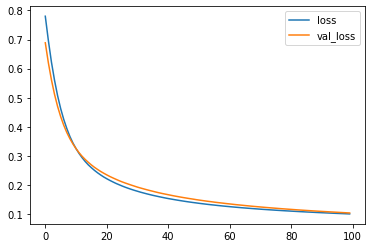

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

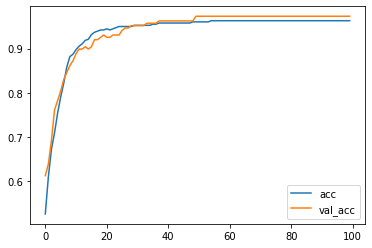

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
P = model.predict(X_test)
#print(P)

In [ ]:
import numpy as np
P = np.round(P).flatten()
print(P)
print(np.mean(P == y_test))
print("hi", model.evaluate(X_test, y_test))

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.]
0.973404255319149
188/188 [==============================] - 0s 48us/sample - loss: 0.1039 - accuracy: 0.9734
hi [0.10390425616122306, 0.9734042]


In [ ]:
model.save('lineareg.h5')
!ls -l
model = tf.keras.models.load_model('lineareg.h5')
print(model.layers)
model.evaluate(X_test,y_test)

total 24
-rw-r--r-- 1 root root 18488 Sep 20 16:01 lineareg.h5
drwxr-xr-x 1 root root  4096 Sep 16 16:29 sample_data
188/188 [==============================] - 0s 158us/sample - loss: 0.1039 - accuracy: 0.9734


[0.10390425616122306, 0.9734042]

In [ ]:
from google.colab import files
files.download('lineareg.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>